In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [29]:
#women = pd.read_csv('women_atp_combine.csv')
women = pd.read_csv('men_atp_combine.csv')

In [30]:
pd.set_option('display.max_columns', None)
women = women.dropna(axis = 0) 
women

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,winner_topic,loser_tpoic
9,9,2010-339,Brisbane,Hard,32,A,20100103,25,104053,Andy Roddick,R,188.0,USA,27.3,104755,Richard Gasquet,R,185.0,FRA,23.5,2,3,QF,16.0,1.0,60.0,45.0,39.0,10.0,0.0,0.0,6.0,2.0,67.0,38.0,31.0,14.0,7.0,8.0,7.0,4410.0,52.0,850.0,5.0,4.0
13,13,2010-339,Brisbane,Hard,32,A,20100103,30,103285,Radek Stepanek,R,185.0,CZE,31.1,104792,Gael Monfils,R,193.0,FRA,23.3,2,3,SF,3.0,0.0,50.0,31.0,20.0,15.0,1.0,1.0,1.0,3.0,45.0,27.0,14.0,7.0,3.0,7.0,12.0,2625.0,13.0,2610.0,1.0,2.0
14,14,2010-339,Brisbane,Hard,32,A,20100103,31,104053,Andy Roddick,R,188.0,USA,27.3,103285,Radek Stepanek,R,185.0,CZE,31.1,2,3,F,7.0,1.0,83.0,64.0,45.0,13.0,3.0,5.0,5.0,8.0,95.0,56.0,38.0,21.0,6.0,8.0,7.0,4410.0,12.0,2625.0,5.0,1.0
15,15,2010-339,Brisbane,Hard,32,A,20100103,24,103285,Radek Stepanek,R,185.0,CZE,31.1,105238,Alexandr Dolgopolov,R,180.0,UKR,21.1,1,3,R16,11.0,7.0,108.0,70.0,53.0,18.0,4.0,7.0,9.0,6.0,98.0,49.0,40.0,22.0,4.0,8.0,12.0,2625.0,131.0,413.0,1.0,4.0
51,51,2010-451,Doha,Hard,32,A,20100104,29,103786,Nikolay Davydenko,R,178.0,RUS,28.5,103819,Roger Federer,R,185.0,SUI,28.4,2,3,SF,2.0,2.0,61.0,48.0,35.0,7.0,2.0,3.0,2.0,3.0,62.0,34.0,23.0,14.0,7.0,10.0,6.0,4930.0,1.0,10550.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30643,30643,2022-560,Us Open,Hard,128,G,20220829,222,207989,Carlos Alcaraz,R,185.0,ESP,19.3,206173,Jannik Sinner,R,188.0,ITA,21.0,-1,5,QF,5.0,5.0,169.0,110.0,69.0,35.0,9.0,16.0,8.0,11.0,213.0,117.0,75.0,43.0,15.0,26.0,4.0,5100.0,13.0,3020.0,2.0,4.0
30650,30650,2022-560,Us Open,Hard,128,G,20220829,214,126610,Matteo Berrettini,R,196.0,ITA,26.3,200221,Alejandro Davidovich Fokina,R,183.0,ESP,23.2,1,5,R16,18.0,3.0,135.0,73.0,61.0,34.0,9.0,13.0,4.0,6.0,146.0,97.0,67.0,26.0,4.0,10.0,14.0,2360.0,39.0,1210.0,4.0,1.0
30654,30654,2022-560,Us Open,Hard,128,G,20220829,210,126207,Frances Tiafoe,R,188.0,USA,24.6,106043,Diego Schwartzman,R,170.0,ARG,30.0,3,5,R32,9.0,3.0,111.0,53.0,34.0,29.0,4.0,10.0,3.0,5.0,108.0,75.0,40.0,13.0,10.0,18.0,26.0,1400.0,16.0,2200.0,1.0,0.0
30655,30655,2022-560,Us Open,Hard,128,G,20220829,209,126094,Andrey Rublev,R,188.0,RUS,24.8,133430,Denis Shapovalov,L,185.0,CAN,23.3,-1,5,R32,9.0,4.0,191.0,120.0,89.0,33.0,13.0,17.0,23.0,8.0,176.0,98.0,77.0,38.0,5.0,9.0,11.0,3120.0,21.0,1640.0,5.0,2.0


In [31]:
women.drop(columns = ['tourney_date', 'winner_id', 'loser_id', 'Unnamed: 0', 'tourney_id', 'tourney_name', 'winner_ioc', 'winner_name', 'loser_name','loser_ioc', 'best_of', 'round'], axis = 1, inplace = True)
women = pd.get_dummies(women, columns = ['winner_topic', 'loser_tpoic', 'surface', 'tourney_level', 'winner_hand', 'loser_hand'])
women

,draw_size,match_num,winner_ht,winner_age,loser_ht,loser_age,score,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,winner_topic_0.0,winner_topic_1.0,winner_topic_2.0,winner_topic_3.0,winner_topic_4.0,winner_topic_5.0,winner_topic_6.0,loser_tpoic_0.0,loser_tpoic_1.0,loser_tpoic_2.0,loser_tpoic_3.0,loser_tpoic_4.0,loser_tpoic_5.0,loser_tpoic_6.0,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,winner_hand_L,winner_hand_R,loser_hand_L,loser_hand_R
9,32,25,188.0,27.3,185.0,23.5,2,16.0,1.0,60.0,45.0,39.0,10.0,0.0,0.0,6.0,2.0,67.0,38.0,31.0,14.0,7.0,8.0,7.0,4410.0,52.0,850.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1
13,32,30,185.0,31.1,193.0,23.3,2,3.0,0.0,50.0,31.0,20.0,15.0,1.0,1.0,1.0,3.0,45.0,27.0,14.0,7.0,3.0,7.0,12.0,2625.0,13.0,2610.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1
14,32,31,188.0,27.3,185.0,31.1,2,7.0,1.0,83.0,64.0,45.0,13.0,3.0,5.0,5.0,8.0,95.0,56.0,38.0,21.0,6.0,8.0,7.0,4410.0,12.0,2625.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1
15,32,24,185.0,31.1,180.0,21.1,1,11.0,7.0,108.0,70.0,53.0,18.0,4.0,7.0,9.0,6.0,98.0,49.0,40.0,22.0,4.0,8.0,12.0,2625.0,131.0,413.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1
51,32,29,178.0,28.5,185.0,28.4,2,2.0,2.0,61.0,48.0,35.0,7.0,2.0,3.0,2.0,3.0,62.0,34.0,23.0,14.0,7.0,10.0,6.0,4930.0,1.0,10550.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30643,128,222,185.0,19.3,188.0,21.0,-1,5.0,5.0,169.0,110.0,69.0,35.0,9.0,16.0,8.0,11.0,213.0,117.0,75.0,43.0,15.0,26.0,4.0,5100.0,13.0,3020.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1
30650,128,214,196.0,26.3,183.0,23.2,1,18.0,3.0,135.0,73.0,61.0,34.0,9.0,13.0,4.0,6.0,146.0,97.0,67.0,26.0,4.0,10.0,14.0,2360.0,39.0,1210.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
30654,128,210,188.0,24.6,170.0,30.0,3,9.0,3.0,111.0,53.0,34.0,29.0,4.0,10.0,3.0,5.0,108.0,75.0,40.0,13.0,10.0,18.0,26.0,1400.0,16.0,2200.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
30655,128,209,188.0,24.8,185.0,23.3,-1,9.0,4.0,191.0,120.0,89.0,33.0,13.0,17.0,23.0,8.0,176.0,98.0,77.0,38.0,5.0,9.0,11.0,3120.0,21.0,1640.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0


In [32]:
y = women['score']
women.drop('score', axis = 1, inplace = True)
women.columns

Index(['draw_size', 'match_num', 'winner_ht', 'winner_age', 'loser_ht',
       'loser_age', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'winner_topic_0.0', 'winner_topic_1.0', 'winner_topic_2.0',
       'winner_topic_3.0', 'winner_topic_4.0', 'winner_topic_5.0',
       'winner_topic_6.0', 'loser_tpoic_0.0', 'loser_tpoic_1.0',
       'loser_tpoic_2.0', 'loser_tpoic_3.0', 'loser_tpoic_4.0',
       'loser_tpoic_5.0', 'loser_tpoic_6.0', 'surface_Clay', 'surface_Grass',
       'surface_Hard', 'tourney_level_A', 'tourney_level_D', 'tourney_level_F',
       'tourney_level_G', 'tourney_level_M', 'winner_hand_L', 'winner_hand_R',
       'loser_hand_L', 'loser_hand_R'],
      dtype='object')

In [33]:
women = women[['winner_ht', 'loser_ht', 'winner_age', 'loser_age', 'winner_hand_L', 'winner_hand_R',
       'loser_hand_L', 'loser_hand_R', 'winner_topic_0.0', 'winner_topic_1.0', 'winner_topic_2.0',
       'winner_topic_3.0', 'winner_topic_4.0', 'winner_topic_5.0',
       'winner_topic_6.0', 'loser_tpoic_0.0', 'loser_tpoic_1.0',
       'loser_tpoic_2.0', 'loser_tpoic_3.0', 'loser_tpoic_4.0',
       'loser_tpoic_5.0', 'loser_tpoic_6.0']]
women

,winner_ht,loser_ht,winner_age,loser_age,winner_hand_L,winner_hand_R,loser_hand_L,loser_hand_R,winner_topic_0.0,winner_topic_1.0,winner_topic_2.0,winner_topic_3.0,winner_topic_4.0,winner_topic_5.0,winner_topic_6.0,loser_tpoic_0.0,loser_tpoic_1.0,loser_tpoic_2.0,loser_tpoic_3.0,loser_tpoic_4.0,loser_tpoic_5.0,loser_tpoic_6.0
9,188.0,185.0,27.3,23.5,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
13,185.0,193.0,31.1,23.3,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
14,188.0,185.0,27.3,31.1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
15,185.0,180.0,31.1,21.1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
51,178.0,185.0,28.5,28.4,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30643,185.0,188.0,19.3,21.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
30650,196.0,183.0,26.3,23.2,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
30654,188.0,170.0,24.6,30.0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
30655,188.0,185.0,24.8,23.3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


# Naive Bayes Classifier

In [42]:
X_train, X_test, y_train, y_test = train_test_split(women, y, stratify = y, test_size = 0.2)


scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)


gNB = GaussianNB()
scv = StratifiedKFold(n_splits = 4, shuffle = True)
parameters = {"var_smoothing": np.logspace(-20, 10, 20)}
clf = GridSearchCV(estimator = gNB, param_grid = parameters, scoring = 'accuracy', cv = scv, n_jobs = -1)
clf.fit(X_train_scl, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-20, 3.79269019e-19, 1.43844989e-17, 5.45559478e-16,
       2.06913808e-14, 7.84759970e-13, 2.97635144e-11, 1.12883789e-09,
       4.28133240e-08, 1.62377674e-06, 6.15848211e-05, 2.33572147e-03,
       8.85866790e-02, 3.35981829e+00, 1.27427499e+02, 4.83293024e+03,
       1.83298071e+05, 6.95192796e+06, 2.63665090e+08, 1.00000000e+10])},
             scoring='accuracy')

In [43]:
time_ = clf.fit(X_train_scl, y_train)
time_

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-20, 3.79269019e-19, 1.43844989e-17, 5.45559478e-16,
       2.06913808e-14, 7.84759970e-13, 2.97635144e-11, 1.12883789e-09,
       4.28133240e-08, 1.62377674e-06, 6.15848211e-05, 2.33572147e-03,
       8.85866790e-02, 3.35981829e+00, 1.27427499e+02, 4.83293024e+03,
       1.83298071e+05, 6.95192796e+06, 2.63665090e+08, 1.00000000e+10])},
             scoring='accuracy')

In [44]:
clf.cv_results_['mean_test_score']

array([0.02839556, 0.03017176, 0.03017176, 0.03150391, 0.04038491,
       0.04970995, 0.05148457, 0.05547551, 0.06523516, 0.07765517,
       0.08297825, 0.10250935, 0.24667199, 0.49866943, 0.50088731,
       0.50088731, 0.50088731, 0.50088731, 0.50088731, 0.50088731])

In [45]:
parameters["var_smoothing"]

array([1.00000000e-20, 3.79269019e-19, 1.43844989e-17, 5.45559478e-16,
       2.06913808e-14, 7.84759970e-13, 2.97635144e-11, 1.12883789e-09,
       4.28133240e-08, 1.62377674e-06, 6.15848211e-05, 2.33572147e-03,
       8.85866790e-02, 3.35981829e+00, 1.27427499e+02, 4.83293024e+03,
       1.83298071e+05, 6.95192796e+06, 2.63665090e+08, 1.00000000e+10])

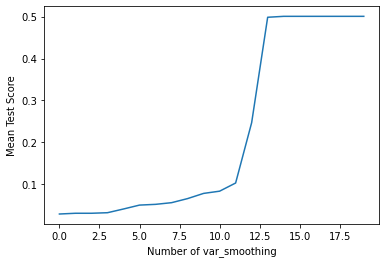

In [46]:
plt.figure()
plt.xlabel('Number of var_smoothing')
plt.ylabel('Mean Test Score')
plt.plot(range(len(parameters["var_smoothing"])), clf.cv_results_['mean_test_score'])
plt.show()

In [39]:
clf.best_estimator_

GaussianNB(var_smoothing=127.42749857031322)

In [40]:
clf.best_score_

0.5008873121449177

In [41]:
y_pre = clf.best_estimator_.predict(X_test_scl)
print('Accuracy Score: ', accuracy_score(y_test, y_pre))
print('Precision Score: ', precision_score(y_test, y_pre, average = 'macro'))
print('Recall Score', recall_score(y_test, y_pre, average = 'macro'))
print('f1_score: ', f1_score(y_test, y_pre, average = 'macro'))

Accuracy Score:  0.5
Precision Score:  0.1
Recall Score 0.2
f1_score:  0.13333333333333333


/Users/zch/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
